# Polarity Analysis with vaderSentiment - Financial News Sentiment

Similar to TextBlob, vaderSentiment also returns the polarity scores of each article's headline and preview. However, vaderSentiment introduce compound score, which taken into account all 3 polarity scores generated (negativity, neutrality, positivity).

## CNBC data

In [1]:
# loading data
%store -r df1

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

hl_compounds = [] # headline compounds
ds_compounds = [] # description/preview compounds

for value in df1["Headlines"].values:
    hl_compounds.append(analyzer.polarity_scores(value)['compound'])
for value in df1["Description"].values:
    ds_compounds.append(analyzer.polarity_scores(value)['compound'])
    
print(hl_compounds[0:10])
print(ds_compounds[0:10])

[0.4404, 0.0, 0.0, 0.5719, 0.0, 0.0, 0.0, -0.296, 0.0, 0.0]
[0.128, -0.2023, 0.3612, 0.5719, -0.6597, -0.2023, 0.0516, -0.6369, -0.1779, 0.3818]


In [3]:
df1['vs_hl_compounds'] = hl_compounds
df1['vs_ds_compounds'] = ds_compounds
df1

,Date,Time,Headlines,Description,vs_hl_compounds,vs_ds_compounds
0,2020-07-17,19:51:00,Jim Cramer: A better way to invest in the Covi...,"""Mad Money"" host Jim Cramer recommended buying...",0.4404,0.1280
1,2020-07-17,19:33:00,Cramer's lightning round: I would own Teradyne,"""Mad Money"" host Jim Cramer rings the lightnin...",0.0000,-0.2023
2,2020-07-17,19:25:00,"Cramer's week ahead: Big week for earnings, ev...","""We'll pay more for the earnings of the non-Co...",0.0000,0.3612
3,2020-07-17,16:24:00,IQ Capital CEO Keith Bliss says tech and healt...,"Keith Bliss, IQ Capital CEO, joins ""Closing Be...",0.5719,0.5719
4,2020-07-16,19:36:00,Wall Street delivered the 'kind of pullback I'...,"""Look for the stocks of high-quality companies...",0.0000,-0.6597
...,...,...,...,...,...,...
2785,2017-12-26,10:15:00,Markets lack Christmas cheer,"According to Kensho, here's how markets have f...",0.2500,0.0000
2786,2018-09-20,11:12:00,Cramer Remix: The biggest mistake you can make...,Jim Cramer revealed his top rule when it comes...,0.2732,0.2023
2787,2017-12-22,19:07:00,Cramer says owning too many stocks and too lit...,Jim Cramer broke down why owning fewer stocks ...,-0.5106,0.6862
2788,2017-12-22,19:07:00,Cramer: I helped investors through the 2010 fl...,"Jim Cramer built on his ""nobody ever made a di...",-0.4019,-0.4404


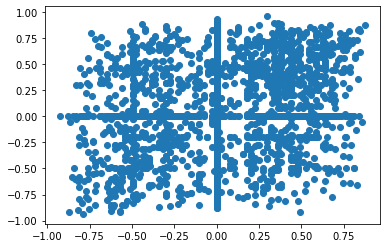

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df1['vs_hl_compounds'].values, df1['vs_ds_compounds'].values)
plt.show()

Similar to analysis in TextBlob, I decided to run clustering algorithms on vaderSentiment data as well.

In [5]:
# storing data
vader_df1 = df1
%store vader_df1

Stored 'vader_df1' (DataFrame)


## Reuters data

In [6]:
# loading data
%store -r df2

In [7]:
analyzer = SentimentIntensityAnalyzer()

hl_compounds = [] # headline compounds
ds_compounds = [] # description/preview compounds

for value in df2["Headlines"].values:
    hl_compounds.append(analyzer.polarity_scores(value)['compound'])
for value in df2["Description"].values:
    ds_compounds.append(analyzer.polarity_scores(value)['compound'])
    
print(hl_compounds[0:10])
print(ds_compounds[0:10])

[0.0, -0.4215, -0.296, -0.5719, -0.6124, -0.6486, 0.4215, 0.0, -0.5267, 0.1655]
[0.0258, -0.836, -0.4767, 0.0, -0.2732, -0.3818, -0.2846, -0.0516, -0.4767, 0.3612]


In [8]:
df2['vs_hl_compounds'] = hl_compounds
df2['vs_ds_compounds'] = ds_compounds
df2

,Date,Headlines,Description,vs_hl_compounds,vs_ds_compounds
0,2020-07-18,TikTok considers London and other locations fo...,TikTok has been in discussions with the UK gov...,0.0000,0.0258
1,2020-07-18,Disney cuts ad spending on Facebook amid growi...,Walt Disney has become the latest company to ...,-0.4215,-0.8360
2,2020-07-18,Trail of missing Wirecard executive leads to B...,Former Wirecard chief operating officer Jan M...,-0.2960,-0.4767
3,2020-07-18,Twitter says attackers downloaded data from up...,Twitter Inc said on Saturday that hackers were...,-0.5719,0.0000
4,2020-07-17,U.S. Republicans seek liability protections as...,A battle in the U.S. Congress over a new coron...,-0.6124,-0.2732
...,...,...,...,...,...
32691,2018-03-20,Malaysia says never hired British data firm at...,The Malaysian government and the ruling party ...,0.0000,-0.3400
32692,2018-03-20,Prosecutors search Volkswagen headquarters in ...,German prosecutors said on Tuesday they had se...,0.0000,0.3612
32693,2018-03-20,McDonald's sets greenhouse gas reduction targets,McDonald's Corp on Tuesday announced an approv...,0.0000,-0.2263
32694,2018-03-20,Pratt & Whitney to deliver spare A320neo engin...,Pratt & Whitney will soon begin deliveries of ...,0.0000,-0.6808


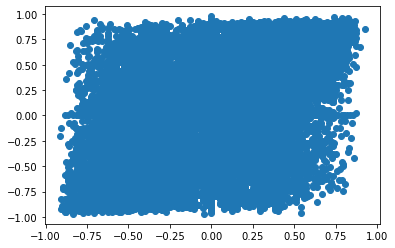

In [9]:
plt.scatter(df2['vs_hl_compounds'].values, df2['vs_ds_compounds'].values)
plt.show()

In [10]:
# storing data
vader_df2 = df2
%store vader_df2

Stored 'vader_df2' (DataFrame)


## The Guardian data

In [11]:
# loading data
%store -r df3

In [12]:
analyzer = SentimentIntensityAnalyzer()

# since guardian dataset does not include description/preview
hl_compounds = [] # headline compounds

for value in df3["Headlines"].values:
    hl_compounds.append(analyzer.polarity_scores(value)['compound'])
    
print(hl_compounds[0:10])

[0.0854, -0.3182, -0.34, 0.0, -0.7845, 0.0, 0.0, -0.3818, -0.5574, 0.0]


In [13]:
df3['vs_hl_compounds'] = hl_compounds
df3

,Date,Headlines,vs_hl_compounds
0,2020-07-19,Business leader \n\n\n Vestager has tasted d...,0.0854
1,2020-07-19,Observer business agenda \n\n\n Centrica: se...,-0.3182
2,2020-07-19,Hidden gems from the world of research \n\n\n...,-0.3400
3,2020-07-19,Johnson is asking Santa for a Christmas recovery,0.0000
4,2020-07-19,‘I now fear the worst’: four grim tales of wor...,-0.7845
...,...,...,...
17789,2017-12-17,"Uber stole trade secrets, bribed foreign offic...",0.0000
17790,2017-12-17,Hundreds to lose jobs as Britvic shuts down No...,-0.4019
17791,2017-12-17,How investing in solar energy can create a bri...,0.7003
17792,2017-12-17,Poundland suppliers hit by insurance downgrade,0.0000


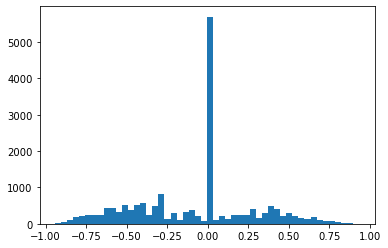

In [14]:
plt.hist(df3['vs_hl_compounds'], bins = 50)
plt.show()

In [15]:
# storing data
vader_df3 = df3
%store vader_df3

Stored 'vader_df3' (DataFrame)
